# **Machine Learning: Project Part 1**

---

**Author: Damien Farrell**

---

In [1]:
# Imports

import os
import whisper
import numpy as np
from dotenv import load_dotenv

from pyannote.audio import Pipeline
from pyannote.audio.pipelines.utils.hook import ProgressHook

INFO:speechbrain.utils.quirks:Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
INFO:speechbrain.utils.quirks:Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []


In [2]:
# Environment Variables
load_dotenv()
HF_API_KEY = os.getenv("HF_API_KEY")
assert HF_API_KEY, "Please set your Hugging Face API key in the HF_API_KEY environment variable."

# Audio File Path
AUDIO_FILE_PATH = "./audio/TrumpHarrisDebate.wav"
assert AUDIO_FILE_PATH, "Please place your audio in a folder called 'audio'. Note: use backslashes if on Windows"

## **Project Part 1: Interview/Debate Audio Analysis**

> 1. **Performs Speaker Diarisation Analysis**  
>    - Uses pre-built models to identify who spoke and when.  
>    - Outputs time segments for each speaker and calculates total speaking time.
> <br><br>
> 2. **Performs Speech to Text Analysis**  
>    - Transcribes the audio for each speaker.  
>    - Combines speaker labels with the transcript (e.g., “[Speaker 1] …”).  
>    - Allows for further analysis, such as word counts or word frequency per speaker.
> <br><br>
> 3. **Leverages a Large Language Model**  
>    - Once the transcript is annotated, the notebook can query a large language model for sentiment or ideological analysis.  
>    - Could identify speaker names or approximate political leanings based on transcript content.
> <br><br>
> 4. **Testing & Evaluation**  
>    - An audio file of the “Harris vs. Trump 2024 US Presidential Debate” will be provided for initial testing.  
>    - A more complex file (with additional speakers or speakers of similar gender) should be used for further evaluation.  
>    - The performance of each component should be documented and assessed.
> <br><br>


---

### **1. Performs Speaker Diarisation Analysis** 

---

In [3]:
# instantiate the pipeline
pipeline = Pipeline.from_pretrained(
  "pyannote/speaker-diarization-3.1",
  use_auth_token="HF_API_KEY")

In [4]:
# run the pipeline on an audio file
with ProgressHook() as hook:
    diarisation = pipeline(AUDIO_FILE_PATH, hook=hook)

Output()

/home/damien/Documents/ATU/machine-learning/.venv/lib/python3.12/site-packages/pyannote/audio/models/blocks/pooling
.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction 
factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1823.)
  std = sequences.std(dim=-1, correction=1)

In [5]:
print(diarisation)

[ 00:00:01.836 -->  00:00:03.034] A SPEAKER_02
[ 00:00:03.152 -->  00:00:04.671] B SPEAKER_02
[ 00:00:04.806 -->  00:00:05.211] C SPEAKER_02
[ 00:00:06.679 -->  00:00:10.037] D SPEAKER_00
[ 00:00:10.257 -->  00:00:20.449] E SPEAKER_01
[ 00:00:20.922 -->  00:00:29.697] F SPEAKER_02
[ 00:00:30.068 -->  00:00:52.512] G SPEAKER_01
[ 00:00:52.799 -->  00:00:55.600] H SPEAKER_02
[ 00:00:56.039 -->  00:01:22.566] I SPEAKER_02
[ 00:01:23.005 -->  00:01:37.214] J SPEAKER_01
[ 00:01:37.214 -->  00:01:37.281] K SPEAKER_00
[ 00:01:37.669 -->  00:01:42.512] L SPEAKER_00
[ 00:01:40.352 -->  00:01:41.196] M SPEAKER_02
[ 00:01:43.187 -->  00:01:45.060] N SPEAKER_02
[ 00:01:46.259 -->  00:01:49.245] O SPEAKER_00
[ 00:01:48.385 -->  00:01:55.607] P SPEAKER_01
[ 00:01:49.887 -->  00:01:51.861] Q SPEAKER_00
[ 00:01:55.624 -->  00:02:08.230] R SPEAKER_00
[ 00:02:08.230 -->  00:02:11.267] S SPEAKER_02
[ 00:02:11.892 -->  00:02:19.637] T SPEAKER_02
[ 00:02:20.076 -->  00:02:26.252] U SPEAKER_02
[ 00:02:26.70

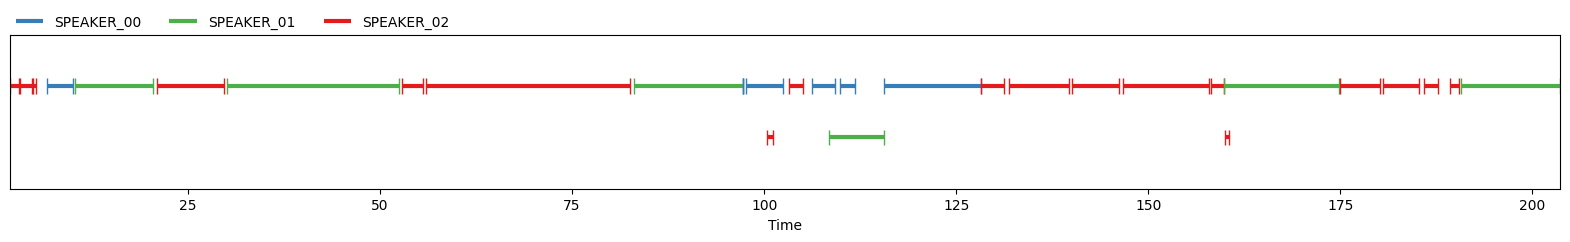

In [6]:
diarisation.support()

---

### **2. Performs Speech to Text Analysis** 

---

In [7]:
model = whisper.load_model("tiny.en")
result = model.transcribe(AUDIO_FILE_PATH, verbose=False, fp16=False)

100%|█████████████████████████████████████| 72.1M/72.1M [00:00<00:00, 92.3MiB/s]
/home/damien/Documents/ATU/machine-learning/.venv/lib/python3.12/site-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitH

Detected language: English


 99%|█████████████████████████████▌| 22100/22381 [00:15<00:00, 1446.61frames/s]


In [8]:
print(result["text"])

 Come on Harris. It's up good to be. Thank you. Welcome to you both. It's wonderful to have you. It's an honor to have you both here tonight. We have inflation like very few people have ever seen before. Probably the worst in our nation's history. This has been a disaster for people for the middle class, but for every class. Donald Trump left us the worst unemployment since the Great Depression. And what we have done is clean up Donald Trump's mess. She's a Marxist. Everybody knows she's a Marxist. Her father's a Marxist professor in economics, and he taught her well. But her vice presidential picks says abortion in the ninth month is absolutely fine. He also says execution after birth. It's execution. No longer abortion because the baby is born is okay. And that's not okay with me. Donald does not have to abandon their faith or deeply held beliefs to agree. The government and Donald Trump certainly should not be telling a woman what to do with her body. Pregnant women who want to carr

---

### **References**

1. https://huggingface.co/pyannote/segmentation
2. http://pyannote.github.io/pyannote-core/reference.html#annotation

---

# END